<span style="color:lightblue">This project aims to build a deep learning model for American Sign Language, the dataset used is a combination of different datasets.</span>

### **Import librairies**

We will start first by adding librairies needed in this project

In [1]:
%pip install pydot
%pip install matplotlib
%pip install scikit-learn
%pip install seaborn
%pip install tensorflow
%pip install tabulate


[notice] A new release of pip is available: 23.3.1 -> 23.3.2
[notice] To update, run: python3.11 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip is available: 23.3.1 -> 23.3.2
[notice] To update, run: python3.11 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip is available: 23.3.1 -> 23.3.2
[notice] To update, run: python3.11 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip is available: 23.3.1 -> 23.3.2
[notice] To update, run: python3.11 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip is available: 23.3.1 -> 23.3.2
[notice] To update, run: python3.11 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip is a

### **Exploring data**

#### **Retrieve data path**

In [2]:
# Path to your dataset folder
dataset_path = "/Users/karima/Desktop/deep/dataset"

#### **Distribution of label**

 In this part we want to count the number of images in each folder. The function will return a list of folder names and their corresponding image counts, along with the percentage of images each folder represents.

In [3]:
import os
from tabulate import tabulate

# Function to count the number of images in each folder
def count_images_in_folders(root_folder):
    folder_counts = []
    total_count = 0

    for folder in os.listdir(root_folder):
        folder_path = os.path.join(root_folder, folder)
        if os.path.isdir(folder_path):
            image_count = len([file for file in os.listdir(folder_path) if file.endswith(('.jpg', '.png', '.jpeg'))])
            folder_counts.append([folder, image_count])
            total_count += image_count

    # Calculate the percentage for each label
    for folder_count in folder_counts:
        percentage = (folder_count[1] / total_count) * 100
        folder_count.append("{:.2f}%".format(percentage))

    return folder_counts

In [4]:
images_counts = count_images_in_folders(dataset_path)

# Print as a table
print(tabulate(images_counts, headers=["Letter", "Image Count", "Percentage"], tablefmt="grid"))

+----------+---------------+--------------+
| Letter   |   Image Count | Percentage   |
+==========+===============+==============+
| R        |          3291 | 4.09%        |
+----------+---------------+--------------+
| U        |          3286 | 4.08%        |
+----------+---------------+--------------+
| I        |          3360 | 4.18%        |
+----------+---------------+--------------+
| N        |          3293 | 4.09%        |
+----------+---------------+--------------+
| G        |          3345 | 4.16%        |
+----------+---------------+--------------+
| T        |          3301 | 4.10%        |
+----------+---------------+--------------+
| S        |          3314 | 4.12%        |
+----------+---------------+--------------+
| A        |          3539 | 4.40%        |
+----------+---------------+--------------+
| F        |          3420 | 4.25%        |
+----------+---------------+--------------+
| O        |          3374 | 4.19%        |
+----------+---------------+----

*We have an imbalanced data therefore, we proceed to adding data using another dataset*

For more insights, we plot the distribution of images.

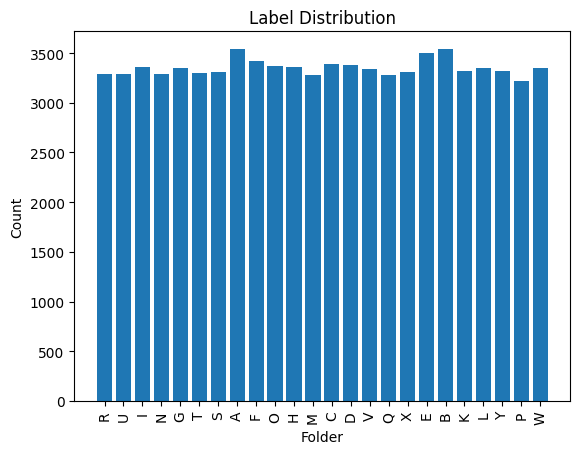

In [5]:
from matplotlib import pyplot as plt
labels = [folder_count[0] for folder_count in images_counts]
percentages = [folder_count[1] for folder_count in images_counts]

# Plot the distribution
plt.bar(labels, percentages)
plt.xlabel("Folder")
plt.ylabel("Count")
plt.title("Label Distribution")
plt.xticks(rotation=90)
plt.show()

### **Resize the image to 100 x 100**

#### **Defining resize function**

In [6]:
from PIL import Image
import os

def resize_images(folder_path, output_size=(100, 100)):
    for label in os.listdir(folder_path):
        label_folder = os.path.join(folder_path, label)

        if os.path.isdir(label_folder):
            for filename in os.listdir(label_folder):
                file_path = os.path.join(label_folder, filename)

                # Open the image
                with Image.open(file_path) as img:
                    resized_img = img.resize(output_size)

                    resized_img.save(file_path)


#### **Resizing the dataset images**

We resized the images so for better performance, we canfix the input for the mode, the shape fixed is 100 x 100

In [7]:
resize_images(dataset_path)

### **Creating train, validation and test datasets**

#### **Defining the split method**

Then we split the data into train, validation and test.

* Train size: 70 %
* Validation size: 15%
* Test size : 15%

In [8]:
from sklearn.model_selection import train_test_split
import shutil

def split_data(dataset_path, output_path, train_size=0.7, val_size=0.15, test_size=0.15, random_state=42):
    for label in os.listdir(dataset_path):
        label_folder = os.path.join(dataset_path, label)

        if os.path.isdir(label_folder):
            # List all image files in the label folder
            images = [f for f in os.listdir(label_folder) if f.endswith(('.jpg', '.png', '.jpeg'))]

            # Split the list of images into train, validation, and test sets
            train_images, test_images = train_test_split(images, test_size=(val_size + test_size), random_state=random_state)
            val_images, test_images = train_test_split(test_images, test_size=test_size/(val_size + test_size), random_state=random_state)

            # Create folders for train, validation, and test sets
            train_folder = os.path.join(output_path, 'train', label)
            val_folder = os.path.join(output_path, 'val', label)
            test_folder = os.path.join(output_path, 'test', label)

            os.makedirs(train_folder, exist_ok=True)
            os.makedirs(val_folder, exist_ok=True)
            os.makedirs(test_folder, exist_ok=True)

            # Move images to their respective folders
            for img in train_images:
                shutil.copy(os.path.join(label_folder, img), os.path.join(train_folder, img))
            for img in val_images:
                shutil.copy(os.path.join(label_folder, img), os.path.join(val_folder, img))
            for img in test_images:
                shutil.copy(os.path.join(label_folder, img), os.path.join(test_folder, img))

#### **Splitting the dataset**

In [9]:
output_path = "/Users/karima/Desktop/deep/splitted_data"
split_data(dataset_path, output_path)

In [10]:
# Defining train, val and test path
train_path= "/Users/karima/Desktop/deep/splitted_data/train"
val_path= "/Users/karima/Desktop/deep/splitted_data/val"
test_path= "/Users/karima/Desktop/deep/splitted_data/test"

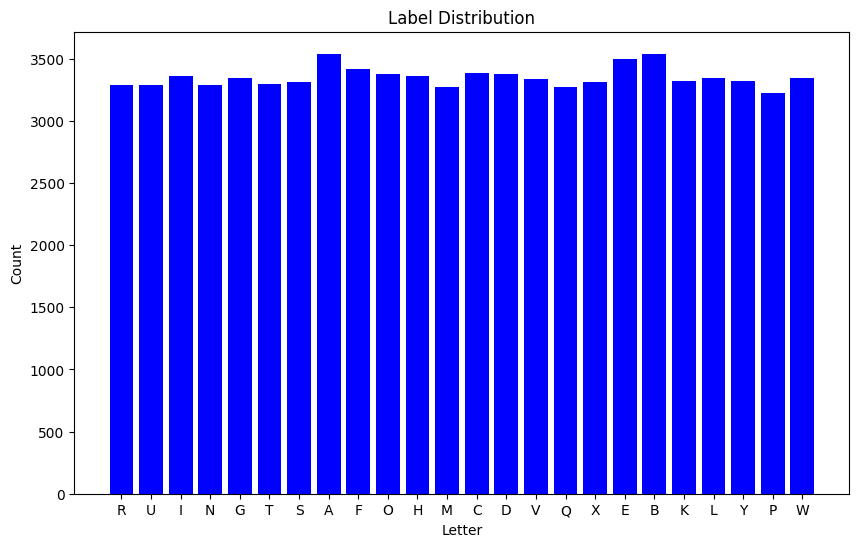

In [35]:
folder_counts = count_images_in_folders(test_path)
labels = [folder_count[0] for folder_count in images_counts]
percentages = [folder_count[1] for folder_count in images_counts]

plt.figure(figsize=(10, 6))
plt.bar(labels, percentages, color='blue')
plt.xlabel("Letter")
plt.ylabel("Count")
plt.title("Label Distribution")
plt.xticks(rotation=0)
plt.show()

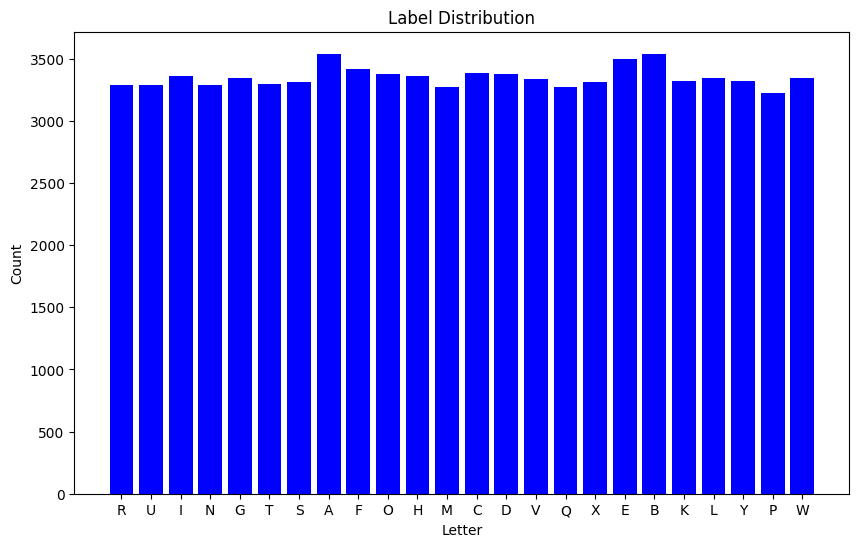

In [36]:
folder_counts = count_images_in_folders(val_path)
labels = [folder_count[0] for folder_count in images_counts]
percentages = [folder_count[1] for folder_count in images_counts]

plt.figure(figsize=(10, 6))
plt.bar(labels, percentages, color='blue')
plt.xlabel("Letter")
plt.ylabel("Count")
plt.title("Label Distribution")
plt.xticks(rotation=0)
plt.show()

### **Build the CNN model**

#### **Hyperparametering the model**

In [12]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense,Flatten,Dropout

model = Sequential()
# shape of image is 100 x 100 and the images are colored
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(100, 100, 3)))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Flatten())

model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
# Number of ouput classes is 24
model.add(Dense(24, activation='softmax'))


model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 98, 98, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 49, 49, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 47, 47, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 23, 23, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 21, 21, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 10, 10, 128)       0

In [30]:
from tensorflow.keras.preprocessing.image import img_to_array, load_img
import numpy as np
import os

def load_and_preprocess_data(folder_path, image_size=(100, 100)):
    X = []
    y = []

    class_labels = os.listdir(folder_path)

    for label in class_labels:
        label_folder = os.path.join(folder_path, label)


        for filename in os.listdir(label_folder):
            file_path = os.path.join(label_folder, filename)

            # Skip if it's not a file 
            if not os.path.isfile(file_path):
                continue

            # Load and preprocess the image
            img = load_img(file_path, target_size=image_size)
            img_array = img_to_array(img)
            img_array /= 255.0  

            X.append(img_array)
            y.append(class_labels.index(label))

    return np.array(X), np.array(y)


X_train, y_train = load_and_preprocess_data(train_path, image_size=(100, 100))
X_val, y_val = load_and_preprocess_data(val_path, image_size=(100, 100))


In [14]:
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)

X_train shape: (56297, 100, 100, 3)
y_train shape: (56297,)


In [15]:
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(monitor='val_accuracy', patience=3, restore_best_weights=True)

# Train the model with early stopping
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_val, y_val), callbacks=[early_stopping])

Epoch 1/10
1760/1760 [==============================] - 270s 153ms/step - loss: 1.7778 - accuracy: 0.4263 - val_loss: 0.5247 - val_accuracy: 0.8419
Epoch 2/10
1760/1760 [==============================] - 269s 153ms/step - loss: 0.6008 - accuracy: 0.7928 - val_loss: 0.2160 - val_accuracy: 0.9359
Epoch 3/10
1760/1760 [==============================] - 283s 161ms/step - loss: 0.3661 - accuracy: 0.8770 - val_loss: 0.1547 - val_accuracy: 0.9574
Epoch 4/10
1760/1760 [==============================] - 252s 143ms/step - loss: 0.2767 - accuracy: 0.9101 - val_loss: 0.0905 - val_accuracy: 0.9766
Epoch 5/10
1760/1760 [==============================] - 290s 165ms/step - loss: 0.2209 - accuracy: 0.9298 - val_loss: 0.0852 - val_accuracy: 0.9785
Epoch 6/10
1760/1760 [==============================] - 272s 155ms/step - loss: 0.1879 - accuracy: 0.9394 - val_loss: 0.0756 - val_accuracy: 0.9793
Epoch 7/10
1760/1760 [==============================] - 265s 151ms/step - loss: 0.1627 - accuracy: 0.9488 - val_

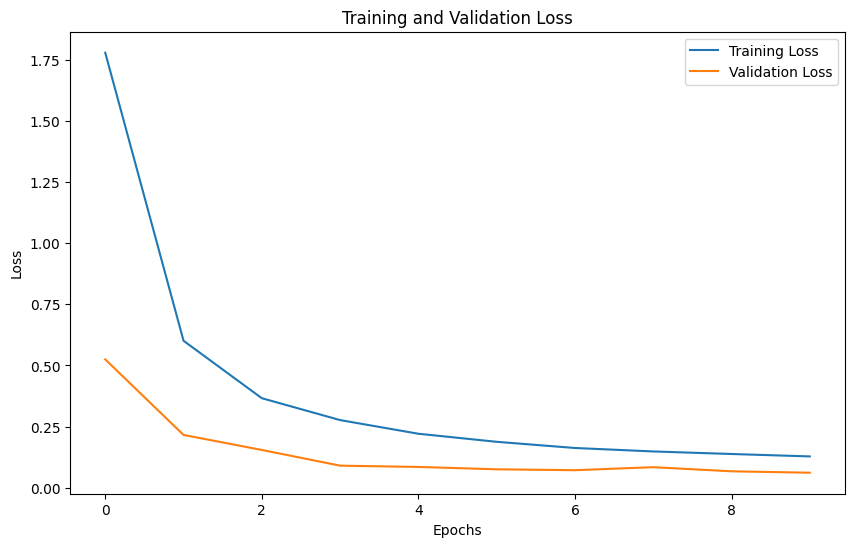

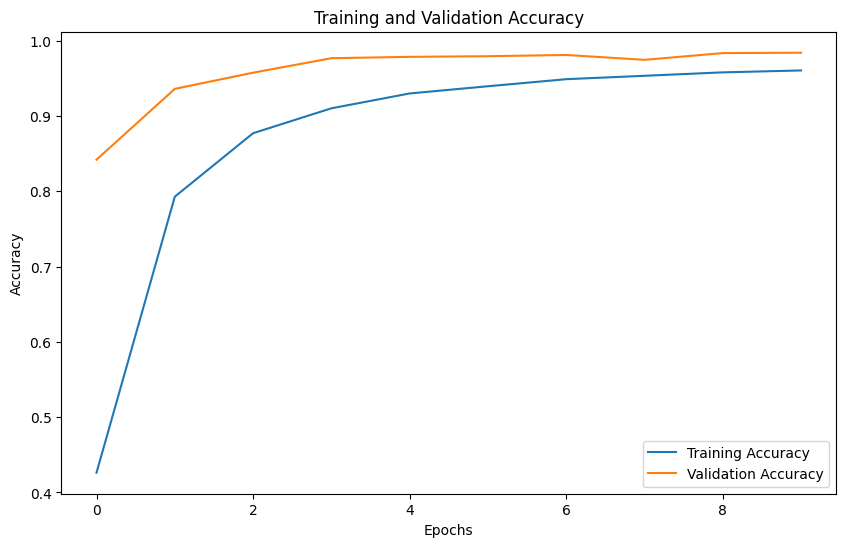

In [16]:
import matplotlib.pyplot as plt

# Plot the training and validation loss
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

# Plot the training and validation accuracy
plt.figure(figsize=(10, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()

### **Evaluating the model on test dataset**

In [33]:
X_test, y_test = load_and_preprocess_data(test_path, image_size=(100, 100))
# Evaluate the model on the test data
loss, accuracy = model.evaluate(X_test, y_test)

print(f'Test Loss: {loss:.4f}')
print(f'Test Accuracy: {accuracy:.4f}')

378/378 [==============================] - 14s 36ms/step - loss: 0.0654 - accuracy: 0.9824
Test Loss: 0.0654
Test Accuracy: 0.9824


378/378 [==============================] - 15s 38ms/step


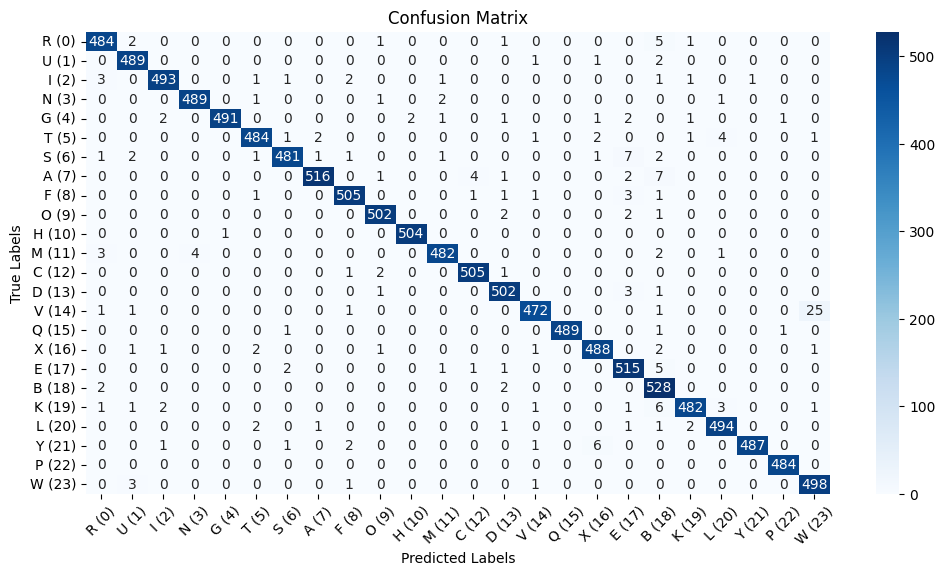

In [31]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns
import numpy as np
class_labels = os.listdir(test_path)
# Assuming you have already loaded and preprocessed the test data
X_test, y_test = load_and_preprocess_data(test_path, image_size=(100, 100))


# Make predictions on the test data
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred_classes)

# Plot the confusion matrix
plt.figure(figsize=(12, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')

# Set the tick labels
tick_labels = [f'{class_labels[i]} ({i})' for i in range(len(class_labels))]
plt.xticks(np.arange(len(class_labels)) + 0.5, tick_labels, rotation=45)
plt.yticks(np.arange(len(class_labels)) + 0.5, tick_labels, rotation=0)

plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

### **Test on random images**

**Here we uploaded images from internet and made the model predict which label.**

In [32]:
from tensorflow.keras.preprocessing import image

image_path = '/Users/karima/Desktop/deep/images/l-1.jpeg'
img = image.load_img(image_path, target_size=(100, 100,3))  
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array /= 255.0  

predictions = model.predict(img_array)

predicted_label = np.argmax(predictions)
print(f"Predicted Class Label: {class_labels[predicted_label]}")


1/1 [==============================] - 0s 17ms/step
Predicted Class Label: L
